### Mount

In [ ]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/drive/My Drive/assignment5/"
if not os.path.exists(datadir):
  !ln -s "/content/drive/My Drive/assignment5/" $datadir
os.chdir(datadir)
!pwd

# Deep Q-Learning 

Install dependencies for AI gym to run properly (shouldn't take more than a minute). If running on google cloud or running locally, only need to run once. Colab may require installing everytime the vm shuts down.

In [1]:
!pip3 install gym pyvirtualdisplay
!sudo apt-get install -y xvfb python-opengl ffmpeg

In [2]:
!pip3 install --upgrade setuptools --user
!pip3 install ez_setup 
!pip3 install gym[atari] 
!pip3 install gym[accept-rom-license] 

For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [9]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import find_max_lives, check_live, get_frame, get_init_state
from model import DQN
from config import *

import matplotlib.pyplot as plt
# %load_ext autoreload
# %autoreload 2

## Understanding the environment

In the following cell, we initialize our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://www.gymlibrary.dev/environments/atari/breakout/. 

In breakout, we will use 3 actions "fire", "left", and "right". "fire" is only used to reset the game when a life is lost, "left" moves the agent left and "right" moves the agent right.

In [11]:
env = gym.make('BreakoutDeterministic-v4')
state = env.reset()

In [12]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

# Creating a DDQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. Once you've created a working DQN agent, use the code in agent.py to create a double DQN agent in __agent_double.py__. Set the flag "double_dqn" to True to train the double DQN agent.

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [13]:
double_dqn = True # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

100000


### Main Training Loop

episode: 0   score: 0.0   memory length: 123   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 0.0
episode: 1   score: 3.0   memory length: 370   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.5
episode: 2   score: 3.0   memory length: 599   epsilon: 1.0    steps: 229    lr: 0.0001     evaluation reward: 2.0
episode: 3   score: 1.0   memory length: 751   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.75
episode: 4   score: 5.0   memory length: 1063   epsilon: 1.0    steps: 312    lr: 0.0001     evaluation reward: 2.4
episode: 5   score: 0.0   memory length: 1187   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 2.0
episode: 6   score: 2.0   memory length: 1406   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 2.0
episode: 7   score: 0.0   memory length: 1530   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.75
episode: 8   score: 0.0   memory length: 1653   epsilon: 1.0    steps: 123

episode: 64   score: 0.0   memory length: 12388   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.6307692307692307
episode: 65   score: 0.0   memory length: 12512   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.606060606060606
episode: 66   score: 0.0   memory length: 12636   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.5820895522388059
episode: 67   score: 3.0   memory length: 12901   epsilon: 1.0    steps: 265    lr: 0.0001     evaluation reward: 1.6029411764705883
episode: 68   score: 2.0   memory length: 13102   epsilon: 1.0    steps: 201    lr: 0.0001     evaluation reward: 1.608695652173913
episode: 69   score: 1.0   memory length: 13272   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.6
episode: 70   score: 2.0   memory length: 13489   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.6056338028169015
episode: 71   score: 0.0   memory length: 13613   epsilon: 1.0    steps: 124    lr: 0.

episode: 130   score: 2.0   memory length: 24762   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.6
episode: 131   score: 0.0   memory length: 24885   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.57
episode: 132   score: 1.0   memory length: 25036   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.57
episode: 133   score: 0.0   memory length: 25160   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.55
episode: 134   score: 2.0   memory length: 25381   epsilon: 1.0    steps: 221    lr: 0.0001     evaluation reward: 1.56
episode: 135   score: 0.0   memory length: 25505   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.56
episode: 136   score: 2.0   memory length: 25723   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.54
episode: 137   score: 0.0   memory length: 25846   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.52
episode: 138   score: 0.0   memory length

episode: 199   score: 2.0   memory length: 37562   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.57
episode: 200   score: 2.0   memory length: 37761   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.58
episode: 201   score: 0.0   memory length: 37885   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.58
episode: 202   score: 6.0   memory length: 38247   epsilon: 1.0    steps: 362    lr: 0.0001     evaluation reward: 1.64
episode: 203   score: 5.0   memory length: 38554   epsilon: 1.0    steps: 307    lr: 0.0001     evaluation reward: 1.66
episode: 204   score: 2.0   memory length: 38752   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.66
episode: 205   score: 0.0   memory length: 38876   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.65
episode: 206   score: 1.0   memory length: 39049   epsilon: 1.0    steps: 173    lr: 0.0001     evaluation reward: 1.64
episode: 207   score: 2.0   memory lengt

episode: 268   score: 1.0   memory length: 50405   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.55
episode: 269   score: 1.0   memory length: 50556   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.53
episode: 270   score: 2.0   memory length: 50754   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.51
episode: 271   score: 4.0   memory length: 51030   epsilon: 1.0    steps: 276    lr: 0.0001     evaluation reward: 1.53
episode: 272   score: 1.0   memory length: 51182   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.53
episode: 273   score: 3.0   memory length: 51448   epsilon: 1.0    steps: 266    lr: 0.0001     evaluation reward: 1.54
episode: 274   score: 2.0   memory length: 51669   epsilon: 1.0    steps: 221    lr: 0.0001     evaluation reward: 1.54
episode: 275   score: 2.0   memory length: 51851   epsilon: 1.0    steps: 182    lr: 0.0001     evaluation reward: 1.54
episode: 276   score: 2.0   memory lengt

episode: 337   score: 2.0   memory length: 63098   epsilon: 1.0    steps: 200    lr: 0.0001     evaluation reward: 1.44
episode: 338   score: 0.0   memory length: 63222   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.43
episode: 339   score: 3.0   memory length: 63471   epsilon: 1.0    steps: 249    lr: 0.0001     evaluation reward: 1.46
episode: 340   score: 0.0   memory length: 63595   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.42
episode: 341   score: 2.0   memory length: 63794   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.42
episode: 342   score: 4.0   memory length: 64093   epsilon: 1.0    steps: 299    lr: 0.0001     evaluation reward: 1.45
episode: 343   score: 1.0   memory length: 64263   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.44
episode: 344   score: 0.0   memory length: 64387   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.43
episode: 345   score: 0.0   memory lengt

episode: 406   score: 0.0   memory length: 75625   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.36
episode: 407   score: 0.0   memory length: 75749   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.36
episode: 408   score: 1.0   memory length: 75901   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.33
episode: 409   score: 3.0   memory length: 76166   epsilon: 1.0    steps: 265    lr: 0.0001     evaluation reward: 1.36
episode: 410   score: 1.0   memory length: 76337   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 1.36
episode: 411   score: 0.0   memory length: 76460   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.36
episode: 412   score: 2.0   memory length: 76679   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.36
episode: 413   score: 2.0   memory length: 76878   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.37
episode: 414   score: 0.0   memory lengt

episode: 475   score: 2.0   memory length: 88432   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.43
episode: 476   score: 2.0   memory length: 88614   epsilon: 1.0    steps: 182    lr: 0.0001     evaluation reward: 1.44
episode: 477   score: 0.0   memory length: 88738   epsilon: 1.0    steps: 124    lr: 0.0001     evaluation reward: 1.44
episode: 478   score: 0.0   memory length: 88861   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.43
episode: 479   score: 4.0   memory length: 89157   epsilon: 1.0    steps: 296    lr: 0.0001     evaluation reward: 1.46
episode: 480   score: 2.0   memory length: 89379   epsilon: 1.0    steps: 222    lr: 0.0001     evaluation reward: 1.47
episode: 481   score: 2.0   memory length: 89578   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.47
episode: 482   score: 3.0   memory length: 89808   epsilon: 1.0    steps: 230    lr: 0.0001     evaluation reward: 1.46
episode: 483   score: 0.0   memory lengt

C:\Users\Nbsyxx\Desktop\assignment5\assignment5_materials\agent_double.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mini_batch = np.array(mini_batch).transpose()


episode: 540   score: 1.0   memory length: 100000   epsilon: 0.9996812200000069    steps: 170    lr: 0.0001     evaluation reward: 1.4
episode: 541   score: 0.0   memory length: 100000   epsilon: 0.9994357000000123    steps: 124    lr: 0.0001     evaluation reward: 1.38
episode: 542   score: 0.0   memory length: 100000   epsilon: 0.9991901800000176    steps: 124    lr: 0.0001     evaluation reward: 1.37
episode: 543   score: 2.0   memory length: 100000   epsilon: 0.9987981400000261    steps: 198    lr: 0.0001     evaluation reward: 1.37
episode: 544   score: 1.0   memory length: 100000   epsilon: 0.9984615400000334    steps: 170    lr: 0.0001     evaluation reward: 1.35
episode: 545   score: 2.0   memory length: 100000   epsilon: 0.9980318800000427    steps: 217    lr: 0.0001     evaluation reward: 1.33
episode: 546   score: 2.0   memory length: 100000   epsilon: 0.9975982600000521    steps: 219    lr: 0.0001     evaluation reward: 1.35
episode: 547   score: 0.0   memory length: 100000

episode: 601   score: 0.0   memory length: 100000   epsilon: 0.9789704200004565    steps: 124    lr: 0.0001     evaluation reward: 1.2
episode: 602   score: 1.0   memory length: 100000   epsilon: 0.978671440000463    steps: 151    lr: 0.0001     evaluation reward: 1.2
episode: 603   score: 3.0   memory length: 100000   epsilon: 0.9781804000004737    steps: 248    lr: 0.0001     evaluation reward: 1.22
episode: 604   score: 3.0   memory length: 100000   epsilon: 0.9777329200004834    steps: 226    lr: 0.0001     evaluation reward: 1.23
episode: 605   score: 1.0   memory length: 100000   epsilon: 0.9774319600004899    steps: 152    lr: 0.0001     evaluation reward: 1.23
episode: 606   score: 2.0   memory length: 100000   epsilon: 0.9770379400004985    steps: 199    lr: 0.0001     evaluation reward: 1.21
episode: 607   score: 1.0   memory length: 100000   epsilon: 0.976736980000505    steps: 152    lr: 0.0001     evaluation reward: 1.21
episode: 608   score: 0.0   memory length: 100000   

episode: 662   score: 4.0   memory length: 100000   epsilon: 0.9570399400009326    steps: 294    lr: 0.0001     evaluation reward: 1.32
episode: 663   score: 2.0   memory length: 100000   epsilon: 0.9566696800009407    steps: 187    lr: 0.0001     evaluation reward: 1.32
episode: 664   score: 0.0   memory length: 100000   epsilon: 0.956424160000946    steps: 124    lr: 0.0001     evaluation reward: 1.31
episode: 665   score: 2.0   memory length: 100000   epsilon: 0.9560222200009547    steps: 203    lr: 0.0001     evaluation reward: 1.33
episode: 666   score: 0.0   memory length: 100000   epsilon: 0.95577670000096    steps: 124    lr: 0.0001     evaluation reward: 1.31
episode: 667   score: 0.0   memory length: 100000   epsilon: 0.9555311800009654    steps: 124    lr: 0.0001     evaluation reward: 1.29
episode: 668   score: 1.0   memory length: 100000   epsilon: 0.9551945800009727    steps: 170    lr: 0.0001     evaluation reward: 1.28
episode: 669   score: 1.0   memory length: 100000  

episode: 723   score: 2.0   memory length: 100000   epsilon: 0.9350619400014097    steps: 181    lr: 0.0001     evaluation reward: 1.44
episode: 724   score: 2.0   memory length: 100000   epsilon: 0.9346283200014192    steps: 219    lr: 0.0001     evaluation reward: 1.46
episode: 725   score: 1.0   memory length: 100000   epsilon: 0.9342897400014265    steps: 171    lr: 0.0001     evaluation reward: 1.47
episode: 726   score: 2.0   memory length: 100000   epsilon: 0.9338957200014351    steps: 199    lr: 0.0001     evaluation reward: 1.49
episode: 727   score: 4.0   memory length: 100000   epsilon: 0.9333056800014479    steps: 298    lr: 0.0001     evaluation reward: 1.51
episode: 728   score: 0.0   memory length: 100000   epsilon: 0.9330601600014532    steps: 124    lr: 0.0001     evaluation reward: 1.5
episode: 729   score: 1.0   memory length: 100000   epsilon: 0.9327176200014606    steps: 173    lr: 0.0001     evaluation reward: 1.48
episode: 730   score: 3.0   memory length: 100000

episode: 784   score: 1.0   memory length: 100000   epsilon: 0.9097773400019586    steps: 171    lr: 0.0001     evaluation reward: 1.89
episode: 785   score: 0.0   memory length: 100000   epsilon: 0.9095338000019639    steps: 123    lr: 0.0001     evaluation reward: 1.86
episode: 786   score: 3.0   memory length: 100000   epsilon: 0.9090447400019745    steps: 247    lr: 0.0001     evaluation reward: 1.89
episode: 787   score: 0.0   memory length: 100000   epsilon: 0.9088012000019798    steps: 123    lr: 0.0001     evaluation reward: 1.87
episode: 788   score: 3.0   memory length: 100000   epsilon: 0.9083121400019905    steps: 247    lr: 0.0001     evaluation reward: 1.88
episode: 789   score: 2.0   memory length: 100000   epsilon: 0.907920100001999    steps: 198    lr: 0.0001     evaluation reward: 1.9
episode: 790   score: 0.0   memory length: 100000   epsilon: 0.9076745800020043    steps: 124    lr: 0.0001     evaluation reward: 1.89
episode: 791   score: 0.0   memory length: 100000 

episode: 845   score: 4.0   memory length: 100000   epsilon: 0.884516500002507    steps: 258    lr: 0.0001     evaluation reward: 2.18
episode: 846   score: 1.0   memory length: 100000   epsilon: 0.8841799000025143    steps: 170    lr: 0.0001     evaluation reward: 2.18
episode: 847   score: 3.0   memory length: 100000   epsilon: 0.8836532200025258    steps: 266    lr: 0.0001     evaluation reward: 2.19
episode: 848   score: 5.0   memory length: 100000   epsilon: 0.8830711000025384    steps: 294    lr: 0.0001     evaluation reward: 2.23
episode: 849   score: 0.0   memory length: 100000   epsilon: 0.8828255800025437    steps: 124    lr: 0.0001     evaluation reward: 2.19
episode: 850   score: 4.0   memory length: 100000   epsilon: 0.8823107800025549    steps: 260    lr: 0.0001     evaluation reward: 2.17
episode: 851   score: 2.0   memory length: 100000   epsilon: 0.8819167600025635    steps: 199    lr: 0.0001     evaluation reward: 2.19
episode: 852   score: 6.0   memory length: 100000

episode: 906   score: 1.0   memory length: 100000   epsilon: 0.8586022600030696    steps: 153    lr: 0.0001     evaluation reward: 2.31
episode: 907   score: 1.0   memory length: 100000   epsilon: 0.8582656600030769    steps: 170    lr: 0.0001     evaluation reward: 2.29
episode: 908   score: 4.0   memory length: 100000   epsilon: 0.8577132400030889    steps: 279    lr: 0.0001     evaluation reward: 2.3
episode: 909   score: 2.0   memory length: 100000   epsilon: 0.8573528800030967    steps: 182    lr: 0.0001     evaluation reward: 2.29
episode: 910   score: 3.0   memory length: 100000   epsilon: 0.8568618400031074    steps: 248    lr: 0.0001     evaluation reward: 2.3
episode: 911   score: 2.0   memory length: 100000   epsilon: 0.8565034600031152    steps: 181    lr: 0.0001     evaluation reward: 2.3
episode: 912   score: 3.0   memory length: 100000   epsilon: 0.8560183600031257    steps: 245    lr: 0.0001     evaluation reward: 2.32
episode: 913   score: 7.0   memory length: 100000  

episode: 967   score: 3.0   memory length: 100000   epsilon: 0.829611100003699    steps: 245    lr: 0.0001     evaluation reward: 2.7
episode: 968   score: 0.0   memory length: 100000   epsilon: 0.8293655800037043    steps: 124    lr: 0.0001     evaluation reward: 2.66
episode: 969   score: 6.0   memory length: 100000   epsilon: 0.8285933800037211    steps: 390    lr: 0.0001     evaluation reward: 2.72
episode: 970   score: 2.0   memory length: 100000   epsilon: 0.8281538200037306    steps: 222    lr: 0.0001     evaluation reward: 2.71
episode: 971   score: 2.0   memory length: 100000   epsilon: 0.8277598000037392    steps: 199    lr: 0.0001     evaluation reward: 2.73
episode: 972   score: 0.0   memory length: 100000   epsilon: 0.8275142800037445    steps: 124    lr: 0.0001     evaluation reward: 2.71
episode: 973   score: 1.0   memory length: 100000   epsilon: 0.827215300003751    steps: 151    lr: 0.0001     evaluation reward: 2.68
episode: 974   score: 5.0   memory length: 100000  

episode: 1028   score: 6.0   memory length: 100000   epsilon: 0.7979073400043872    steps: 360    lr: 4e-05     evaluation reward: 3.35
episode: 1029   score: 3.0   memory length: 100000   epsilon: 0.797459860004397    steps: 226    lr: 4e-05     evaluation reward: 3.33
episode: 1030   score: 6.0   memory length: 100000   epsilon: 0.7967530000044123    steps: 357    lr: 4e-05     evaluation reward: 3.37
episode: 1031   score: 3.0   memory length: 100000   epsilon: 0.7962302800044236    steps: 264    lr: 4e-05     evaluation reward: 3.35
episode: 1032   score: 3.0   memory length: 100000   epsilon: 0.7957412200044343    steps: 247    lr: 4e-05     evaluation reward: 3.36
episode: 1033   score: 6.0   memory length: 100000   epsilon: 0.7950007000044503    steps: 374    lr: 4e-05     evaluation reward: 3.4
episode: 1034   score: 3.0   memory length: 100000   epsilon: 0.7945136200044609    steps: 246    lr: 4e-05     evaluation reward: 3.41
episode: 1035   score: 7.0   memory length: 100000

episode: 1089   score: 3.0   memory length: 100000   epsilon: 0.7665322600050684    steps: 228    lr: 4e-05     evaluation reward: 3.79
episode: 1090   score: 2.0   memory length: 100000   epsilon: 0.7661382400050769    steps: 199    lr: 4e-05     evaluation reward: 3.74
episode: 1091   score: 6.0   memory length: 100000   epsilon: 0.7654492000050919    steps: 348    lr: 4e-05     evaluation reward: 3.75
episode: 1092   score: 7.0   memory length: 100000   epsilon: 0.7646433400051094    steps: 407    lr: 4e-05     evaluation reward: 3.78
episode: 1093   score: 8.0   memory length: 100000   epsilon: 0.7638058000051275    steps: 423    lr: 4e-05     evaluation reward: 3.81
episode: 1094   score: 4.0   memory length: 100000   epsilon: 0.7632236800051402    steps: 294    lr: 4e-05     evaluation reward: 3.77
episode: 1095   score: 4.0   memory length: 100000   epsilon: 0.7626712600051522    steps: 279    lr: 4e-05     evaluation reward: 3.79
episode: 1096   score: 5.0   memory length: 1000

episode: 1150   score: 5.0   memory length: 100000   epsilon: 0.7322743000058121    steps: 331    lr: 4e-05     evaluation reward: 3.84
episode: 1151   score: 2.0   memory length: 100000   epsilon: 0.7318763200058207    steps: 201    lr: 4e-05     evaluation reward: 3.83
episode: 1152   score: 3.0   memory length: 100000   epsilon: 0.7314229000058305    steps: 229    lr: 4e-05     evaluation reward: 3.84
episode: 1153   score: 2.0   memory length: 100000   epsilon: 0.7310288800058391    steps: 199    lr: 4e-05     evaluation reward: 3.8
episode: 1154   score: 2.0   memory length: 100000   epsilon: 0.7306348600058477    steps: 199    lr: 4e-05     evaluation reward: 3.79
episode: 1155   score: 6.0   memory length: 100000   epsilon: 0.7299616600058623    steps: 340    lr: 4e-05     evaluation reward: 3.82
episode: 1156   score: 2.0   memory length: 100000   epsilon: 0.7295260600058717    steps: 220    lr: 4e-05     evaluation reward: 3.79
episode: 1157   score: 10.0   memory length: 1000

episode: 1211   score: 8.0   memory length: 100000   epsilon: 0.6978539800065593    steps: 470    lr: 4e-05     evaluation reward: 4.13
episode: 1212   score: 4.0   memory length: 100000   epsilon: 0.6972877000065716    steps: 286    lr: 4e-05     evaluation reward: 4.12
episode: 1213   score: 6.0   memory length: 100000   epsilon: 0.6966164800065862    steps: 339    lr: 4e-05     evaluation reward: 4.17
episode: 1214   score: 4.0   memory length: 100000   epsilon: 0.6960284200065989    steps: 297    lr: 4e-05     evaluation reward: 4.18
episode: 1215   score: 2.0   memory length: 100000   epsilon: 0.6956700400066067    steps: 181    lr: 4e-05     evaluation reward: 4.17
episode: 1216   score: 6.0   memory length: 100000   epsilon: 0.6949592200066221    steps: 359    lr: 4e-05     evaluation reward: 4.18
episode: 1217   score: 3.0   memory length: 100000   epsilon: 0.6944959000066322    steps: 234    lr: 4e-05     evaluation reward: 4.11
episode: 1218   score: 4.0   memory length: 1000

episode: 1272   score: 8.0   memory length: 100000   epsilon: 0.6609091600073613    steps: 461    lr: 4e-05     evaluation reward: 4.69
episode: 1273   score: 4.0   memory length: 100000   epsilon: 0.6603607000073732    steps: 277    lr: 4e-05     evaluation reward: 4.7
episode: 1274   score: 3.0   memory length: 100000   epsilon: 0.659911240007383    steps: 227    lr: 4e-05     evaluation reward: 4.67
episode: 1275   score: 5.0   memory length: 100000   epsilon: 0.6593073400073961    steps: 305    lr: 4e-05     evaluation reward: 4.65
episode: 1276   score: 5.0   memory length: 100000   epsilon: 0.6585846400074118    steps: 365    lr: 4e-05     evaluation reward: 4.67
episode: 1277   score: 6.0   memory length: 100000   epsilon: 0.657883720007427    steps: 354    lr: 4e-05     evaluation reward: 4.7
episode: 1278   score: 9.0   memory length: 100000   epsilon: 0.6569036200074483    steps: 495    lr: 4e-05     evaluation reward: 4.78
episode: 1279   score: 7.0   memory length: 100000  

episode: 1333   score: 6.0   memory length: 100000   epsilon: 0.6205666600082371    steps: 330    lr: 4e-05     evaluation reward: 5.18
episode: 1334   score: 7.0   memory length: 100000   epsilon: 0.6197588200082547    steps: 408    lr: 4e-05     evaluation reward: 5.19
episode: 1335   score: 5.0   memory length: 100000   epsilon: 0.6190697800082696    steps: 348    lr: 4e-05     evaluation reward: 5.22
episode: 1336   score: 7.0   memory length: 100000   epsilon: 0.618224320008288    steps: 427    lr: 4e-05     evaluation reward: 5.26
episode: 1337   score: 6.0   memory length: 100000   epsilon: 0.6175055800083036    steps: 363    lr: 4e-05     evaluation reward: 5.24
episode: 1338   score: 7.0   memory length: 100000   epsilon: 0.6167710000083195    steps: 371    lr: 4e-05     evaluation reward: 5.22
episode: 1339   score: 6.0   memory length: 100000   epsilon: 0.6160364200083355    steps: 371    lr: 4e-05     evaluation reward: 5.26
episode: 1340   score: 13.0   memory length: 1000

episode: 1390   score: 8.0   memory length: 100000   epsilon: 0.5827387600090583    steps: 440    lr: 1.6000000000000003e-05     evaluation reward: 5.52
episode: 1391   score: 6.0   memory length: 100000   epsilon: 0.581972500009075    steps: 387    lr: 1.6000000000000003e-05     evaluation reward: 5.56
episode: 1392   score: 7.0   memory length: 100000   epsilon: 0.581235940009091    steps: 372    lr: 1.6000000000000003e-05     evaluation reward: 5.58
episode: 1393   score: 5.0   memory length: 100000   epsilon: 0.5806894600091028    steps: 276    lr: 1.6000000000000003e-05     evaluation reward: 5.56
episode: 1394   score: 4.0   memory length: 100000   epsilon: 0.5801370400091148    steps: 279    lr: 1.6000000000000003e-05     evaluation reward: 5.58
episode: 1395   score: 8.0   memory length: 100000   epsilon: 0.5795054200091285    steps: 319    lr: 1.6000000000000003e-05     evaluation reward: 5.61
episode: 1396   score: 9.0   memory length: 100000   epsilon: 0.5785649200091489    

episode: 1444   score: 5.0   memory length: 100000   epsilon: 0.544798000009882    steps: 292    lr: 1.6000000000000003e-05     evaluation reward: 5.99
episode: 1445   score: 2.0   memory length: 100000   epsilon: 0.5443980400098907    steps: 202    lr: 1.6000000000000003e-05     evaluation reward: 5.97
episode: 1446   score: 8.0   memory length: 100000   epsilon: 0.5435050600099101    steps: 451    lr: 1.6000000000000003e-05     evaluation reward: 6.01
episode: 1447   score: 6.0   memory length: 100000   epsilon: 0.542770480009926    steps: 371    lr: 1.6000000000000003e-05     evaluation reward: 6.05
episode: 1448   score: 7.0   memory length: 100000   epsilon: 0.5420220400099423    steps: 378    lr: 1.6000000000000003e-05     evaluation reward: 6.06
episode: 1449   score: 5.0   memory length: 100000   epsilon: 0.5414478400099547    steps: 290    lr: 1.6000000000000003e-05     evaluation reward: 6.05
episode: 1450   score: 6.0   memory length: 100000   epsilon: 0.5407330600099702    

episode: 1498   score: 4.0   memory length: 100000   epsilon: 0.5031051400107871    steps: 276    lr: 1.6000000000000003e-05     evaluation reward: 6.78
episode: 1499   score: 9.0   memory length: 100000   epsilon: 0.5021309800108082    steps: 492    lr: 1.6000000000000003e-05     evaluation reward: 6.78
episode: 1500   score: 6.0   memory length: 100000   epsilon: 0.5014795600108224    steps: 329    lr: 1.6000000000000003e-05     evaluation reward: 6.82
episode: 1501   score: 4.0   memory length: 100000   epsilon: 0.5009608000108337    steps: 262    lr: 1.6000000000000003e-05     evaluation reward: 6.81
episode: 1502   score: 5.0   memory length: 100000   epsilon: 0.500345020010847    steps: 311    lr: 1.6000000000000003e-05     evaluation reward: 6.82
episode: 1503   score: 4.0   memory length: 100000   epsilon: 0.49979062001085317    steps: 280    lr: 1.6000000000000003e-05     evaluation reward: 6.86
episode: 1504   score: 7.0   memory length: 100000   epsilon: 0.4990243600108483  

episode: 1552   score: 13.0   memory length: 100000   epsilon: 0.4605173200106047    steps: 506    lr: 1.6000000000000003e-05     evaluation reward: 7.32
episode: 1553   score: 5.0   memory length: 100000   epsilon: 0.45991342001060087    steps: 305    lr: 1.6000000000000003e-05     evaluation reward: 7.34
episode: 1554   score: 4.0   memory length: 100000   epsilon: 0.4593669400105974    steps: 276    lr: 1.6000000000000003e-05     evaluation reward: 7.32
episode: 1555   score: 9.0   memory length: 100000   epsilon: 0.4584917800105919    steps: 442    lr: 1.6000000000000003e-05     evaluation reward: 7.35
episode: 1556   score: 8.0   memory length: 100000   epsilon: 0.45769978001058687    steps: 400    lr: 1.6000000000000003e-05     evaluation reward: 7.33
episode: 1557   score: 7.0   memory length: 100000   epsilon: 0.45681472001058127    steps: 447    lr: 1.6000000000000003e-05     evaluation reward: 7.35
episode: 1558   score: 7.0   memory length: 100000   epsilon: 0.45608806001057

episode: 1606   score: 9.0   memory length: 100000   epsilon: 0.4162762000103248    steps: 468    lr: 1.6000000000000003e-05     evaluation reward: 7.68
episode: 1607   score: 4.0   memory length: 100000   epsilon: 0.4157237800103213    steps: 279    lr: 1.6000000000000003e-05     evaluation reward: 7.62
episode: 1608   score: 15.0   memory length: 100000   epsilon: 0.41459518001031415    steps: 570    lr: 1.6000000000000003e-05     evaluation reward: 7.75
episode: 1609   score: 6.0   memory length: 100000   epsilon: 0.41388436001030965    steps: 359    lr: 1.6000000000000003e-05     evaluation reward: 7.75
episode: 1610   score: 8.0   memory length: 100000   epsilon: 0.41299930001030405    steps: 447    lr: 1.6000000000000003e-05     evaluation reward: 7.79
episode: 1611   score: 14.0   memory length: 100000   epsilon: 0.4119974200102977    steps: 506    lr: 1.6000000000000003e-05     evaluation reward: 7.86
episode: 1612   score: 8.0   memory length: 100000   epsilon: 0.4111757200102

episode: 1660   score: 4.0   memory length: 100000   epsilon: 0.37059562001003576    steps: 298    lr: 6.400000000000001e-06     evaluation reward: 8.27
episode: 1661   score: 6.0   memory length: 100000   epsilon: 0.3698551000100311    steps: 374    lr: 6.400000000000001e-06     evaluation reward: 8.27
episode: 1662   score: 11.0   memory length: 100000   epsilon: 0.36885124001002473    steps: 507    lr: 6.400000000000001e-06     evaluation reward: 8.27
episode: 1663   score: 8.0   memory length: 100000   epsilon: 0.36790678001001875    steps: 477    lr: 6.400000000000001e-06     evaluation reward: 8.3
episode: 1664   score: 9.0   memory length: 100000   epsilon: 0.3670593400100134    steps: 428    lr: 6.400000000000001e-06     evaluation reward: 8.34
episode: 1665   score: 6.0   memory length: 100000   epsilon: 0.36641980001000934    steps: 323    lr: 6.400000000000001e-06     evaluation reward: 8.36
episode: 1666   score: 5.0   memory length: 100000   epsilon: 0.3658614400100058    

episode: 1714   score: 7.0   memory length: 100000   epsilon: 0.3212401600097235    steps: 428    lr: 6.400000000000001e-06     evaluation reward: 8.89
episode: 1715   score: 14.0   memory length: 100000   epsilon: 0.32025214000971725    steps: 499    lr: 6.400000000000001e-06     evaluation reward: 8.96
episode: 1716   score: 11.0   memory length: 100000   epsilon: 0.31916314000971036    steps: 550    lr: 6.400000000000001e-06     evaluation reward: 9.01
episode: 1717   score: 14.0   memory length: 100000   epsilon: 0.3180444400097033    steps: 565    lr: 6.400000000000001e-06     evaluation reward: 9.1
episode: 1718   score: 8.0   memory length: 100000   epsilon: 0.31714156000969757    steps: 456    lr: 6.400000000000001e-06     evaluation reward: 9.05
episode: 1719   score: 5.0   memory length: 100000   epsilon: 0.3165317200096937    steps: 308    lr: 6.400000000000001e-06     evaluation reward: 9.0
episode: 1720   score: 5.0   memory length: 100000   epsilon: 0.31587634000968956   

episode: 1768   score: 15.0   memory length: 100000   epsilon: 0.2693384200093951    steps: 681    lr: 6.400000000000001e-06     evaluation reward: 9.88
episode: 1769   score: 11.0   memory length: 100000   epsilon: 0.2683900000093891    steps: 479    lr: 6.400000000000001e-06     evaluation reward: 9.89
episode: 1770   score: 12.0   memory length: 100000   epsilon: 0.2672812000093821    steps: 560    lr: 6.400000000000001e-06     evaluation reward: 9.93
episode: 1771   score: 11.0   memory length: 100000   epsilon: 0.26621596000937536    steps: 538    lr: 6.400000000000001e-06     evaluation reward: 9.94
episode: 1772   score: 14.0   memory length: 100000   epsilon: 0.26494876000936735    steps: 640    lr: 6.400000000000001e-06     evaluation reward: 9.99
episode: 1773   score: 10.0   memory length: 100000   epsilon: 0.26398846000936127    steps: 485    lr: 6.400000000000001e-06     evaluation reward: 10.02
episode: 1774   score: 14.0   memory length: 100000   epsilon: 0.2629113400093

episode: 1822   score: 9.0   memory length: 100000   epsilon: 0.21685654000906307    steps: 474    lr: 6.400000000000001e-06     evaluation reward: 10.25
episode: 1823   score: 11.0   memory length: 100000   epsilon: 0.21577744000905624    steps: 545    lr: 6.400000000000001e-06     evaluation reward: 10.26
episode: 1824   score: 17.0   memory length: 100000   epsilon: 0.2144251000090477    steps: 683    lr: 6.400000000000001e-06     evaluation reward: 10.38
episode: 1825   score: 11.0   memory length: 100000   epsilon: 0.21334600000904086    steps: 545    lr: 6.400000000000001e-06     evaluation reward: 10.39
episode: 1826   score: 9.0   memory length: 100000   epsilon: 0.21247876000903537    steps: 438    lr: 6.400000000000001e-06     evaluation reward: 10.38
episode: 1827   score: 23.0   memory length: 100000   epsilon: 0.2108888200090253    steps: 803    lr: 6.400000000000001e-06     evaluation reward: 10.5
episode: 1828   score: 12.0   memory length: 100000   epsilon: 0.2097028000

episode: 1876   score: 11.0   memory length: 100000   epsilon: 0.15769414000868875    steps: 528    lr: 2.560000000000001e-06     evaluation reward: 11.6
episode: 1877   score: 8.0   memory length: 100000   epsilon: 0.1568645200086835    steps: 419    lr: 2.560000000000001e-06     evaluation reward: 11.57
episode: 1878   score: 14.0   memory length: 100000   epsilon: 0.1555696000086753    steps: 654    lr: 2.560000000000001e-06     evaluation reward: 11.62
episode: 1879   score: 12.0   memory length: 100000   epsilon: 0.1544786200086684    steps: 551    lr: 2.560000000000001e-06     evaluation reward: 11.65
episode: 1880   score: 15.0   memory length: 100000   epsilon: 0.15340942000866165    steps: 540    lr: 2.560000000000001e-06     evaluation reward: 11.73
episode: 1881   score: 21.0   memory length: 100000   epsilon: 0.151882840008652    steps: 771    lr: 2.560000000000001e-06     evaluation reward: 11.89
episode: 1882   score: 18.0   memory length: 100000   epsilon: 0.150473080008

episode: 1930   score: 11.0   memory length: 100000   epsilon: 0.09907624000849959    steps: 530    lr: 2.560000000000001e-06     evaluation reward: 12.9
episode: 1931   score: 8.0   memory length: 100000   epsilon: 0.09809020000850026    steps: 498    lr: 2.560000000000001e-06     evaluation reward: 12.76
episode: 1932   score: 22.0   memory length: 100000   epsilon: 0.0967061800085012    steps: 699    lr: 2.560000000000001e-06     evaluation reward: 12.85
episode: 1933   score: 8.0   memory length: 100000   epsilon: 0.09588052000850177    steps: 417    lr: 2.560000000000001e-06     evaluation reward: 12.85
episode: 1934   score: 13.0   memory length: 100000   epsilon: 0.09469054000850258    steps: 601    lr: 2.560000000000001e-06     evaluation reward: 12.83
episode: 1935   score: 8.0   memory length: 100000   epsilon: 0.09382330000850317    steps: 438    lr: 2.560000000000001e-06     evaluation reward: 12.81
episode: 1936   score: 11.0   memory length: 100000   epsilon: 0.0927877600

episode: 1983   score: 9.0   memory length: 100000   epsilon: 0.039537640008540195    steps: 423    lr: 2.560000000000001e-06     evaluation reward: 12.89
episode: 1984   score: 11.0   memory length: 100000   epsilon: 0.03841696000854096    steps: 566    lr: 2.560000000000001e-06     evaluation reward: 12.86
episode: 1985   score: 10.0   memory length: 100000   epsilon: 0.03742300000854164    steps: 502    lr: 2.560000000000001e-06     evaluation reward: 12.75
episode: 1986   score: 12.0   memory length: 100000   epsilon: 0.03621520000854246    steps: 610    lr: 2.560000000000001e-06     evaluation reward: 12.73
episode: 1987   score: 13.0   memory length: 100000   epsilon: 0.03499948000854329    steps: 614    lr: 2.560000000000001e-06     evaluation reward: 12.73
episode: 1988   score: 11.0   memory length: 100000   epsilon: 0.03388672000854405    steps: 562    lr: 2.560000000000001e-06     evaluation reward: 12.78
episode: 1989   score: 32.0   memory length: 100000   epsilon: 0.03236

KeyboardInterrupt: 

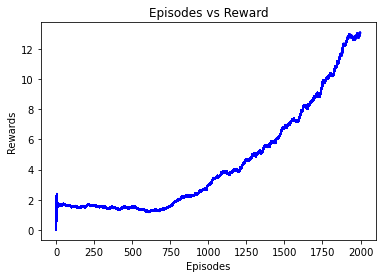

In [15]:
rewards, episodes = [], []
best_eval_reward = 0
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state, HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_ddqn.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_ddqn.pth")
                best_eval_reward = np.mean(evaluation_reward)


In [16]:
torch.save(agent.policy_net이, f"./save_model/breakout_DDQN_2000_episodes.pth")